<a href="https://colab.research.google.com/github/marcelalozano27-ship-it/machine-learning-2026-spring/blob/main/CA-04/CA4MarcelaBrandon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble Methods (CA-04)
### Marcela Lozano and Brandon Richard


In [1]:
# gather data from "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true" and save it as a dataframe called "census_data"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier
!pip install graphviz
import graphviz
from sklearn.tree import plot_tree
import time
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
# print the first 5 rows of the dataframe
print(df.head())
# print the shape of the dataframe
print(df.shape)
# print the column names of the dataframe
print(df.columns)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.6/180.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.2.0
    Uninstalling xgboost-3.2.0:
      Successfully uninstalled xgboost-3.2.0
Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
  hours_per_week_bin occupation_bin msr_bin  capital_gl_bin race_sex_bin  \
0      b. 31-40       b. Mid - Low    b. Mid     c. > 0        c. Hi

In [2]:
#Used code from previous assignment to clean and transform the data
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
# print the first 5 rows of the dataframe
print(df.head())
# print the shape of the dataframe
print(df.shape)
# print the column names of the dataframe
print(df.columns)

display(df.describe(include="all"))
print("Column names:")
print(df.columns.tolist())

print("Null values in each column:")
print(df.isnull().sum())

df.flag.unique()

train_df = df[df["flag"] == "train"].copy()
test_df  = df[df["flag"] == "test"].copy()

X_train_raw = train_df.drop(columns=["y", "flag"])
y_train = train_df["y"].astype(int)

X_test_raw  = test_df.drop(columns=["y", "flag"])
y_test  = test_df["y"].astype(int)

print("X_train:", X_train_raw.shape, "y_train:", y_train.shape)
print("X_test :", X_test_raw.shape,  "y_test :", y_test.shape)

  hours_per_week_bin occupation_bin msr_bin  capital_gl_bin race_sex_bin  \
0      b. 31-40       b. Mid - Low    b. Mid     c. > 0        c. High     
1       a. 0-30            e. High   c. High     a. = 0        c. High     
2      b. 31-40             a. Low    b. Mid     a. = 0        c. High     
3      b. 31-40             a. Low   c. High     a. = 0         b. Mid     
4      b. 31-40            e. High   c. High     a. = 0         a. Low     

  education_num_bin education_bin workclass_bin      age_bin        flag   y  
0         c. 13      c. Bachelors    b. income    d. 36-40 & 56-60  train  0  
1         c. 13      c. Bachelors    b. income            e. 40-55  train  0  
2       b. 9-12            b. Mid    b. income    d. 36-40 & 56-60  train  0  
3        a. 0-8            a. Low    b. income            e. 40-55  train  0  
4         c. 13      c. Bachelors    b. income   b. 26-30 & 71-100  train  0  
(48842, 11)
Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin',

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Column names:
['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin', 'flag', 'y']
Null values in each column:
hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64
X_train: (32561, 9) y_train: (32561,)
X_test : (16281, 9) y_test : (16281,)


In [3]:
from sklearn.preprocessing import OneHotEncoder

#Label encoding on ordinal variables like hours-per-week and education-num-bin and age and capital gain
from sklearn.preprocessing import LabelEncoder


ordinal_cols = ["hours_per_week_bin", "education_num_bin", "age_bin", "capital_gl_bin"]

encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    encoders[col] = le
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

#one hot encoding for occupation, marital, race sex, education bin, workclass bin
categorical_cols = ["occupation_bin", "msr_bin", "race_sex_bin", "education_bin", "workclass_bin"]
ohe = OneHotEncoder(drop="first", sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[categorical_cols])
X_test_ohe  = ohe.transform(X_test[categorical_cols])
#convert the ohe arrays to dataframes and concatenate them with the original dataframes
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_ohe_df  = pd.DataFrame(X_test_ohe,  columns=ohe.get_feature_names_out(categorical_cols), index=X_test.index)
X_train = pd.concat([X_train.drop(columns=categorical_cols), X_train_ohe_df], axis=1)
X_test  = pd.concat([X_test.drop(columns=categorical_cols),  X_test_ohe_df], axis=1)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)

X_train: (32561, 9) y_train: (32561,)
X_test : (16281, 9) y_test : (16281,)
X_train: (32561, 17) y_train: (32561,)
X_test : (16281, 17) y_test : (16281,)


In [4]:
print("Data types of X_train after encoding:")
print(X_train.dtypes)

print("\nFirst 5 rows of X_train after encoding:")
display(X_train.head())

Data types of X_train after encoding:
hours_per_week_bin                int64
capital_gl_bin                    int64
education_num_bin                 int64
age_bin                           int64
occupation_bin_b. Mid - Low     float64
occupation_bin_c. Mid - Mid     float64
occupation_bin_d. Mid - High    float64
occupation_bin_e. High          float64
msr_bin_b. Mid                  float64
msr_bin_c. High                 float64
race_sex_bin_b. Mid             float64
race_sex_bin_c. High            float64
education_bin_b. Mid            float64
education_bin_c. Bachelors      float64
education_bin_d. Masters        float64
education_bin_e. High           float64
workclass_bin_b. income         float64
dtype: object

First 5 rows of X_train after encoding:


,hours_per_week_bin,capital_gl_bin,education_num_bin,age_bin,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,msr_bin_b. Mid,msr_bin_c. High,race_sex_bin_b. Mid,race_sex_bin_c. High,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_b. income
0,1,2,2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0,0,2,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1,0,1,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,0,0,4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
print("Data types of X_test after encoding:")
print(X_test.dtypes)

print("\nFirst 5 rows of X_test after encoding:")
display(X_test.head())

Data types of X_test after encoding:
hours_per_week_bin                int64
capital_gl_bin                    int64
education_num_bin                 int64
age_bin                           int64
occupation_bin_b. Mid - Low     float64
occupation_bin_c. Mid - Mid     float64
occupation_bin_d. Mid - High    float64
occupation_bin_e. High          float64
msr_bin_b. Mid                  float64
msr_bin_c. High                 float64
race_sex_bin_b. Mid             float64
race_sex_bin_c. High            float64
education_bin_b. Mid            float64
education_bin_c. Bachelors      float64
education_bin_d. Masters        float64
education_bin_e. High           float64
workclass_bin_b. income         float64
dtype: object

First 5 rows of X_test after encoding:


,hours_per_week_bin,capital_gl_bin,education_num_bin,age_bin,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,msr_bin_b. Mid,msr_bin_c. High,race_sex_bin_b. Mid,race_sex_bin_c. High,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_b. income
32561,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32562,3,0,1,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
32563,1,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
32564,1,2,1,4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
32565,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


All columns are now numerical (e.g., `int64` or `float64`) and the original categorical columns have been replaced by the encoded versions.

## Train and Evaluate Random Forest Models




In [6]:
rf_accuracy_results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n_estimators_val in n_estimators:
    print(f"Training RandomForestClassifier with n_estimators={n_estimators_val}...")
    rf_model = RandomForestClassifier(n_estimators=n_estimators_val, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred)
    rf_accuracy_results.append(accuracy_rf)


print("\nRandom Forest training and evaluation complete.")

Training RandomForestClassifier with n_estimators=50...
Training RandomForestClassifier with n_estimators=100...
Training RandomForestClassifier with n_estimators=150...
Training RandomForestClassifier with n_estimators=200...
Training RandomForestClassifier with n_estimators=250...
Training RandomForestClassifier with n_estimators=300...
Training RandomForestClassifier with n_estimators=350...
Training RandomForestClassifier with n_estimators=400...
Training RandomForestClassifier with n_estimators=450...
Training RandomForestClassifier with n_estimators=500...

Random Forest training and evaluation complete.


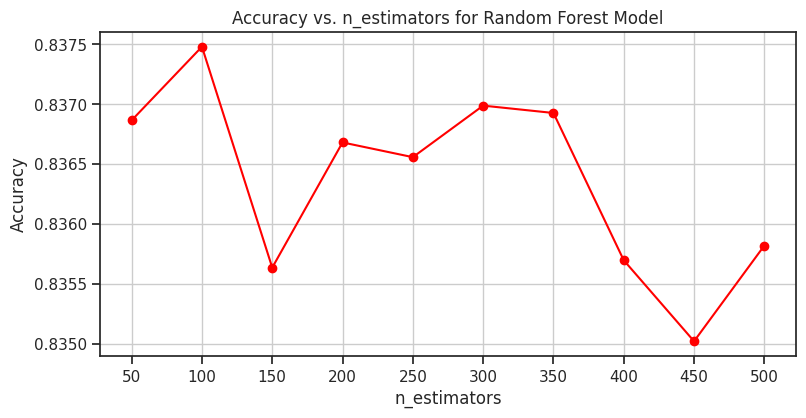

In [7]:
plt.figure(figsize=(8,4))
plt.plot(n_estimators, rf_accuracy_results, marker = 'o', color = 'red')
plt.title('Accuracy vs. n_estimators for Random Forest Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [8]:
randomforest_auc_results=[]
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for n_estimator_values_auc in n_estimators:
  rf_model = RandomForestClassifier(n_estimators = n_estimator_values_auc, random_state=42)
  rf_model.fit(X_train, y_train)
  y_probability = rf_model.predict_proba(X_test)[:,1]
  aucresults = roc_auc_score(y_test, y_probability)
  randomforest_auc_results.append(aucresults)

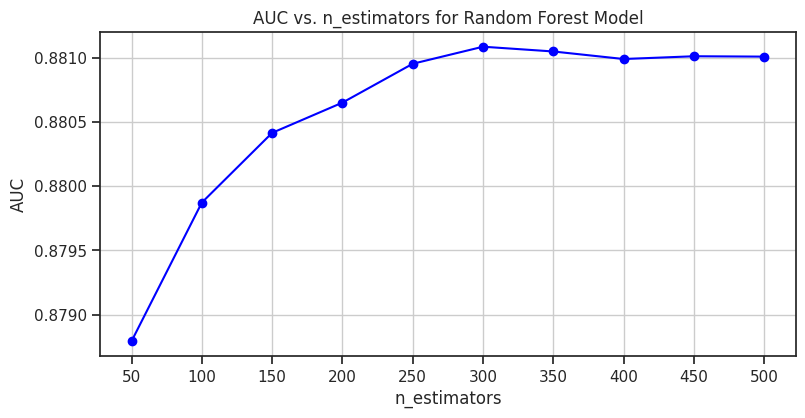

In [9]:
plt.figure(figsize=(8,4))
plt.plot(n_estimators, randomforest_auc_results, marker = 'o', color = 'blue')
plt.title('AUC vs. n_estimators for Random Forest Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

## 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
The accuracy of the Random Forest model exhibits minor fluctuations while increasing the number of estimators. Even though the plot seems to have large jumps, the accuracy values are within a very narrow range so the variation of increasing estimators is actually quite minimial. The fluctuations in the accuracy are expected given the random probability nature of Random Forest where there are typically small variations in performance rather than large gaps.
# 2. Is there an optimal value of the estimator within the given range?
The AUC plot shows steady performance improvement as the number of estimators increases from 50 to about 300 estimators. After 300 estimators the model starts to plateau. This indicates that adding trees beyond 300 provides diminishing returns. While the highest AUC can be seen at 500 estimators, the gain in performance is marginal and unnecessary computational cost can be avoided. The optimal number of estimators for the Random Forest is 300;


# Train and Evaluate AdaBoost Models

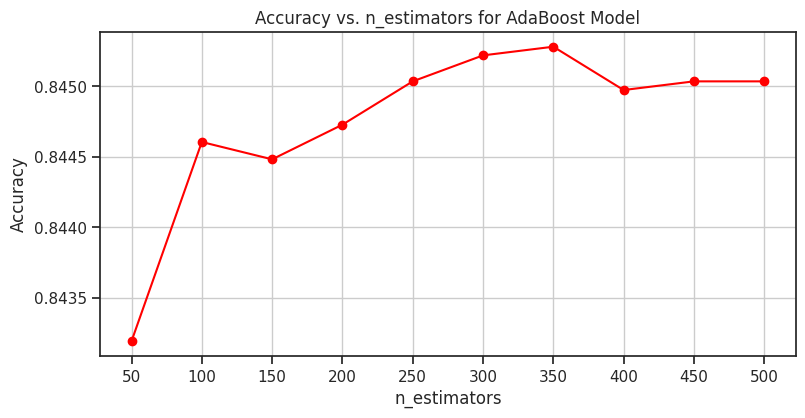

In [10]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_accuracy_results=[]
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for n_estimator_ada_values in n_estimators:
    ada_model = AdaBoostClassifier(n_estimators = n_estimator_ada_values, random_state = 42)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    adaboost_accuracy_results.append(accuracy)

plt.figure(figsize=(8,4))
plt.plot(n_estimators, adaboost_accuracy_results, marker = 'o', color = 'red')
plt.title('Accuracy vs. n_estimators for AdaBoost Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

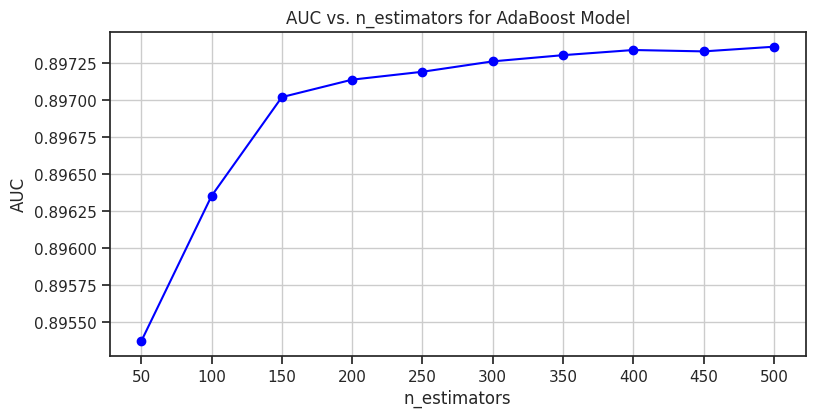

In [11]:
adaboost_auc_results=[]
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for n_estimator_ada_values in n_estimators:
    ada_model = AdaBoostClassifier(n_estimators=n_estimator_ada_values, random_state=42)
    ada_model.fit(X_train, y_train)
    y_proba = ada_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    adaboost_auc_results.append(auc)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators, adaboost_auc_results, marker='o', color='blue')
plt.title('AUC vs. n_estimators for AdaBoost Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

## 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
The AdaBoost model shows an overall increasing accuracy as we increase the number of estimators. Accuracy improves steadily from 50 estimators to about 350 where it begins to stabilize with very small variations. Compared to Random Forest, fluctuations were not as varied and instead overall rose significantly before plateauing.
Overall AdaBoost shows gradual increases (makes sense given it is improving sequentially after weighting errors).

## 2. Is there an optimal value of the estimator within the given range?
Based on both the accuracy and AUC plots, the optimal amount of estimators is between 300 and 350 estimators. Accuracy hits its peak at about 350 estimators and AUC continues to increase after this point but plateaus at around 300 estimators. The marginal gains in AUC after using 350 estimators is minimal and indicates diminishing returns. Selecting 350 estimators is optimal as it provides a balance of predictive accuracy and computational efficiency.

# Gradient Boosting

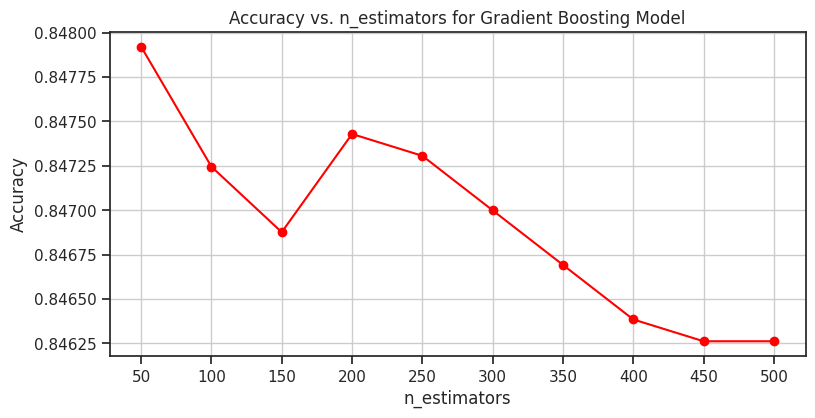

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gradientboosting_accuracy_results = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for gb_n_estimators in n_estimators:
    gb_model = GradientBoostingClassifier(n_estimators=gb_n_estimators, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    gradientboosting_accuracy_results.append(accuracy)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators, gradientboosting_accuracy_results, marker='o', color='red')
plt.title('Accuracy vs. n_estimators for Gradient Boosting Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()


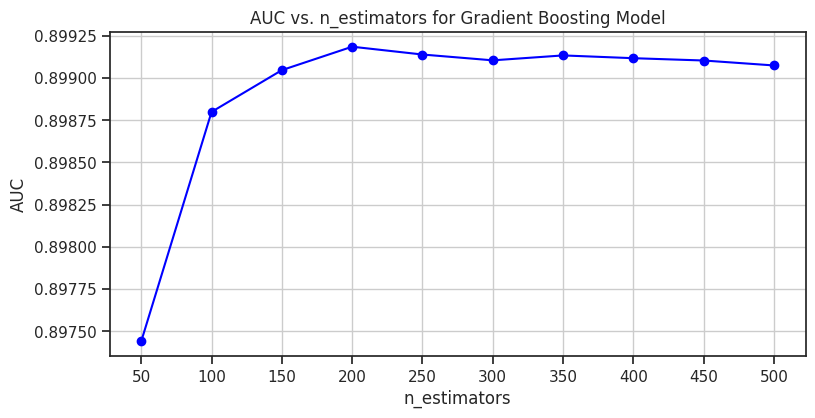

In [13]:
gradientboosting_auc_results = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for gb_estimators in n_estimators:
    gb_model = GradientBoostingClassifier(n_estimators=gb_estimators, random_state=42)
    gb_model.fit(X_train, y_train)
    y_proba = gb_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    gradientboosting_auc_results.append(auc)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators, gradientboosting_auc_results, marker='o', color='blue')
plt.title('AUC vs. n_estimators for Gradient Boosting Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

## 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
The GradientBoost model has an early peak in accuracy at about 50 estimators and then has a gradual decline as we increase the number of estimators. Unlike AdaBoost which had steady improvement, Gradient Boosting peaks early and has slight performance degradation when we add more estimators. When looking at Accuracy and AUC, adding more estimators to the model doesn't enhance the model and may introduce model complexity.

## 2. Is there an optimal value of the estimator within the given range?
The optimal number of estimators for the GradientBoost model is about 200 because even though the accuracy reaches its maximum at 50 estimators, the AUC peaks at 200 estimators before plateauing. In this case AUC is a more comprehensive measure of performance as it takes into account ranking ability rather than just the models ability to classify correctly. Therefore the optimal value is 200 estimators to find the ideal balance between predictive ability and the complexity of the model within the given range.

# XGB Classifier

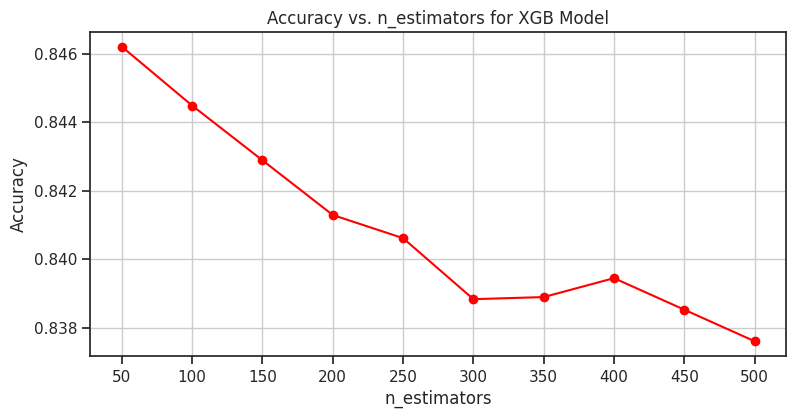

In [14]:
from xgboost import XGBClassifier

xgb_accuracy_result = []
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for xgb_estimators in n_estimators:
    xgb_model = XGBClassifier(n_estimators=xgb_estimators, random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    xgb_accuracy_result.append(accuracy)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators, xgb_accuracy_result, marker='o', color='red')
plt.title('Accuracy vs. n_estimators for XGB Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

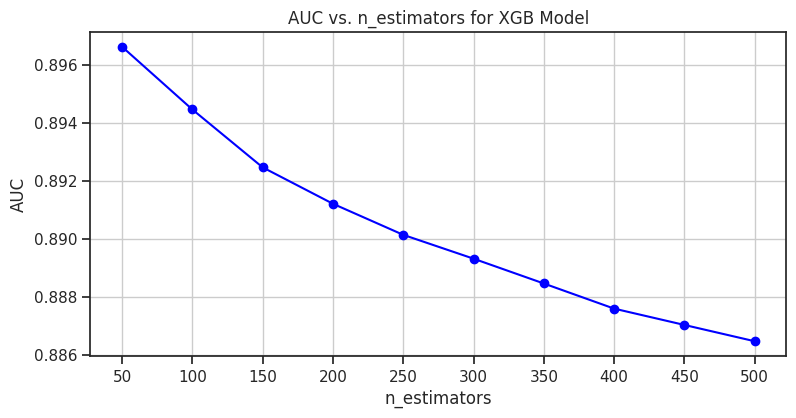

In [15]:
xgb_aucresults = []

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for xgb_auc_estimators in n_estimators:
    xgb_model = XGBClassifier(n_estimators=xgb_auc_estimators, random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    y_proba = xgb_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    xgb_aucresults.append(auc)

plt.figure(figsize=(8, 4))
plt.plot(n_estimators, xgb_aucresults, marker='o', color='blue')
plt.title('AUC vs. n_estimators for XGB Model')
plt.xticks(n_estimators)
plt.grid(True)
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

## 1. Write your observations about the Classifier’s behavior with respect to the number of estimators
The Extreme Gradient Boosting model shows a clear decline in both accuracy and AUC. They both reached their highest values at 50 estimators before steadily decreasing as the number of estimators increased. Unlike AdaBoost and Random Forest which plateaued or slightly improved with more estimators, the XGBoost model shows optimal performance early on and suggests that increasing the number of estimators beyond where the model quickly converges are not effective in enhancing the model's predictive performance.

## 2. Is there an optimal value of the estimator within the given range?
The optimal number of estimators to use for the XGBoost model within the given range is 50. Both the accuracy and AUC reached their maximum values at 50 estimators and decline after that. Additional estimators do not improve model performance so 50 provides the best performance. This may be due to a fixed learning rate combined with increasing estimators which can lead to reduced generalization.

##### We went through several iterations with AI to format  a table that includes the MAXIMUM accuracy and AUC from the above graphs. This does not necessarily mean they are the optimal estimators but rather were used to determine what the optimal estimators should be.

In [16]:
import pandas as pd
import numpy as np

n_estimators = [50,100,150,200,250,300,350,400,450,500]

def best_metric(n_list, metric_list):
    metric_arr = np.array(metric_list, dtype=float)
    best_idx = int(metric_arr.argmax())
    return float(metric_arr[best_idx]), int(n_list[best_idx])

summary = []

# Random Forest
best_acc, best_acc_n = best_metric(n_estimators, rf_accuracy_results)
best_auc, best_auc_n = best_metric(n_estimators, randomforest_auc_results)
summary.append(["Random Forest", best_acc_n, best_auc_n])

# AdaBoost
best_acc, best_acc_n = best_metric(n_estimators, adaboost_accuracy_results)
best_auc, best_auc_n = best_metric(n_estimators, adaboost_auc_results)
summary.append(["AdaBoost", best_acc_n, best_auc_n])

# Gradient Boost
best_acc, best_acc_n = best_metric(n_estimators, gradientboosting_accuracy_results)
best_auc, best_auc_n = best_metric(n_estimators, gradientboosting_auc_results)
summary.append(["Gradient Boost", best_acc_n, best_auc_n])

# XGBoost
best_acc, best_acc_n = best_metric(n_estimators, xgb_accuracy_result)
best_auc, best_auc_n = best_metric(n_estimators, xgb_aucresults)
summary.append(["XGBoost (XGB)", best_acc_n, best_auc_n])

# Build table
compare_df = pd.DataFrame(
    summary,
    columns=["Model", "Accuracy", "AUC"]
).set_index("Model")

# Transpose to match your screenshot layout
out = compare_df.T
out.index = ["Accuracy", "AUC"]  # exact row labels

display(
    out.style
      .format("{:d}")  # integers
      .set_caption("Optimal n_estimators (based on peak metrics)")
      .set_properties(**{'text-align': 'center', 'padding': '8px', 'color': 'black'})
      .set_table_styles([
          {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', 'white'), ('padding', '8px'), ('color', 'black')]},
          {'selector': 'td', 'props': [('vertical-align', 'middle'), ('padding', '8px'), ('color', 'black')]},
          {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-weight', 'bold'), ('color', 'black')]}
      ])
)

print("")
print("Optimal n_estimators corresponding to the peak Accuracy and AUC values for each ensemble model.")

Model,Random Forest,AdaBoost,Gradient Boost,XGBoost (XGB)
Accuracy,100,350,50,50
AUC,300,500,200,50



Optimal n_estimators corresponding to the peak Accuracy and AUC values for each ensemble model.


In [17]:
best_metrics_table = pd.DataFrame({
    "Random Forest": [
        max(rf_accuracy_results),
        max(randomforest_auc_results)
    ],
    "AdaBoost": [
        max(adaboost_accuracy_results),
        max(adaboost_auc_results)
    ],
    "Gradient Boost": [
        max(gradientboosting_accuracy_results),
        max(gradientboosting_auc_results)
    ],
    "XGB": [
        max(xgb_accuracy_result),
        max(xgb_aucresults)
    ]
}, index=["Accuracy", "AUC"]).round(4)

display(
    best_metrics_table.style
    .highlight_max(axis=1, props='font-weight: bold; background-color: lightgreen;')
    .set_caption("Maximum Accuracy and AUC for each Model")
    .set_properties(**{'text-align': 'center', 'padding': '8px', 'color': 'black'})
    .set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', 'white'), ('padding', '8px'), ('color', 'black')]},
        {'selector': 'td', 'props': [('vertical-align', 'middle'), ('padding', '8px'), ('color', 'black')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-weight', 'bold'), ('color', 'black')]}
    ])
)

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.837500,0.845300,0.847900,0.846200
AUC,0.881100,0.897400,0.899200,0.896600


## Comparison of Model Accuracy and AUC

Based on our analysis of the best Accuracy and AUC values, the Gradient Boosting model had the highest overall (AUC) which indicates the highest performance across models. Adaboost also showed strong performance with both a competitive accuracy and AUC score likely due to the sequential boosting which increases the models predicitve capabilities with more estimators. Random Forest had stable performance but it was slightly lower than the boosting methods. XGBoost had a high accuracy but it had a slightly lower AUC and performance declined as the number of estimators increased. Overall we can see that the boosting models performed the best compared to Random Forest when addressing AUC. Gradient Boosting stands out as providing the best balance between AUC and accuracy.

## Final Optimal Estimator Reccomendation
Based on our analysis of the AUC and Accuracy for a defined range of n_estimator values, these are our recommended optimal estimators when using each model. These optimal values aim to balance predictive ability with model complexity while taking into account diminishing returns and computational requirements.

**Random forest optimal: 300 n_estimators**

**Adaboost optimal: 350 n_estimators**

**GradientBoost optimal: 200  n_estimators**

**XGBoost optimal: 50  n_estimators**